<a href="https://colab.research.google.com/github/kwakguanghee/gangnam/blob/main/%EA%B0%95%EB%82%A8%EA%B5%AC_%EC%B6%9C%ED%87%B4%EA%B7%BC%EC%8B%9C%EA%B0%84%EB%B3%84_%EC%9D%B8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.5 MB/s eta 0:00:00


In [ ]:
#해상도 선명하게
%config lnlineeBack.figure_format = 'retina'

In [ ]:
import pandas as pd

def load_csv(file_path):

    #CSV 파일을 읽어서 데이터프레임으로 반환하는 함수
    #:param file_path: 읽어올 CSV 파일의 경로
    #:return: 데이터프레임

    try:
        # CSV 파일 읽기
        subway = pd.read_csv(file_path, encoding='cp949')
        return subway
    except Exception as e:
        print("Error:", e)
        return None

# CSV 파일 경로 설정
csv_file_path = "시간대별_승차인원.csv"  # 실제 파일 경로로 변경 필요

# CSV 파일 불러오기
subway = load_csv(csv_file_path)

# 데이터프레임 확인
subway

,연번,수송일자,호선,역번호,역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2023-01-01,1호선,150,서울역,승차,215,145,231,594,...,2655,2509,2696,2549,2462,2177,2190,1808,734,7
1,2,2023-01-01,1호선,150,서울역,하차,154,636,595,939,...,2282,2295,2526,1930,1897,1487,991,609,280,46
2,3,2023-01-01,1호선,151,시청,승차,48,73,106,194,...,843,895,959,985,670,630,515,330,146,0
3,4,2023-01-01,1호선,151,시청,하차,64,247,293,463,...,602,575,533,456,285,267,246,154,79,18
4,5,2023-01-01,1호선,152,종각,승차,407,235,158,201,...,1145,1402,1223,1272,911,913,906,602,232,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148790,148791,2023-09-30,8호선,2826,수진,하차,8,0,8,40,...,195,165,136,171,190,178,132,153,162,133
148791,148792,2023-09-30,8호선,2827,모란,승차,39,0,39,34,...,200,189,205,233,219,169,103,137,117,105
148792,148793,2023-09-30,8호선,2827,모란,하차,9,0,9,45,...,132,156,164,165,216,215,176,121,113,113
148793,148794,2023-09-30,8호선,2828,남위례,승차,20,0,20,54,...,184,211,201,214,182,189,112,131,134,105


In [ ]:
import pandas as pd

def find_busiest_hours(station_name, subway_data):
    try:
        # 입력된 역의 정보만 필터링
        station_data = subway_data[subway_data['역명'] == station_name]

        # 각 역의 승차 정보 출력
        boarding_data = station_data[station_data['승하차구분'] == '승차']
        max_boarding_hour = boarding_data.iloc[:, 2:].sum().idxmax()  # 승차인원이 가장 많은 시간대
        max_boarding_count = boarding_data.iloc[:, 2:].sum().max()    # 승차인원 수
        print(f"{station_name} 역에서 가장 많은 인원이 탑승한 시간대는 '{max_boarding_hour}' 이며, 해당 시간대의 이용인원 수는 {max_boarding_count}명 입니다.")

        # 각 역의 하차 정보 출력
        alighting_data = station_data[station_data['승하차구분'] == '하차']
        max_alighting_hour = alighting_data.iloc[:, 2:].sum().idxmax()  # 하차인원이 가장 많은 시간대
        max_alighting_count = alighting_data.iloc[:, 2:].sum().max()    # 하차인원 수
        print(f"{station_name} 역에서 가장 많은 인원이 하차한 시간대는 '{max_alighting_hour}' 이며, 해당 시간대의 이용인원 수는 {max_alighting_count}명 입니다.")

    except Exception as e:
        print("Error:", e)

# 강남구에 포함된 역 리스트
stations = ["강남구청", "강남", "개포동", "구룡", "논현", "대모산입구", "대청", "대치", "도곡", "매봉",
            "봉은사", "삼성", "삼성중앙", "선릉", "선정릉", "수서", "신논현", "신사", "압구정로데오",
            "압구정", "양재", "언주", "역삼", "일원", "청담", "학동", "학여울", "한티"]

# 원하는 역을 입력하여 해당 역의 정보만 출력
station_name = input("조회하고 싶은 역의 이름을 입력하세요: ")
if station_name in stations:
    subway = pd.read_csv("시간대별_승차인원.csv", encoding='cp949')
    find_busiest_hours(station_name, subway)
else:
    print("해당하는 역이 존재하지 않습니다.")

조회하고 싶은 역의 이름을 입력하세요: 강남
Error: reduction operation 'argmax' not allowed for this dtype


In [5]:
import pandas as pd

# 강남구 지하철 역 혼잡도 데이터를 불러옵니다.
import pandas as pd

# 강남구 지하철 역 혼잡도 데이터를 불러옵니다.
subway_congestion_data = pd.read_csv("서울교통공사_지하철혼잡도정보_20231231.csv", encoding="cp949")

# 데이터에 대한 기본적인 정보를 확인합니다.
print(subway_congestion_data.head())
print(subway_congestion_data.info())


# 데이터에 대한 기본적인 정보를 확인합니다.
print(subway_congestion_data.head())
print(subway_congestion_data.info())


   연번 요일구분  호선  역번호  출발역 상하구분  5시30분  6시00분  6시30분  7시00분  ...  20시30분  \
0   1   평일   1  150  서울역   상선    7.9   17.7   18.4   32.6  ...    17.9   
1   2   평일   1  150  서울역   하선   11.6   11.6   13.2   22.9  ...    38.1   
2   3   평일   1  151   시청   상선    7.2   14.5   15.1   25.8  ...    22.6   
3   4   평일   1  151   시청   하선    9.3   10.1   14.8   21.6  ...    34.6   
4   5   평일   1  152   종각   상선    7.0   12.7   10.5   17.5  ...    27.7   

   21시00분  21시30분  22시00분  22시30분  23시00분  23시30분  00시00분  00시30분  01시00분  
0    19.5    15.6    15.5    18.7    12.4     9.0     9.3     1.8     0.0  
1    35.2    30.9    42.4    29.0    20.5    13.3     5.8     0.0     0.0  
2    24.0    19.3    19.9    22.2    16.5    12.4     6.5     2.2     0.0  
3    31.6    30.4    33.0    24.3    18.1    11.5     3.9     0.5     0.0  
4    31.9    25.3    27.5    28.3    21.5    15.1     7.4     2.0     0.0  

[5 rows x 46 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Da

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (41.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and direc

강남구에 있는 지하철 역 중 하나를 입력하세요: 학여울


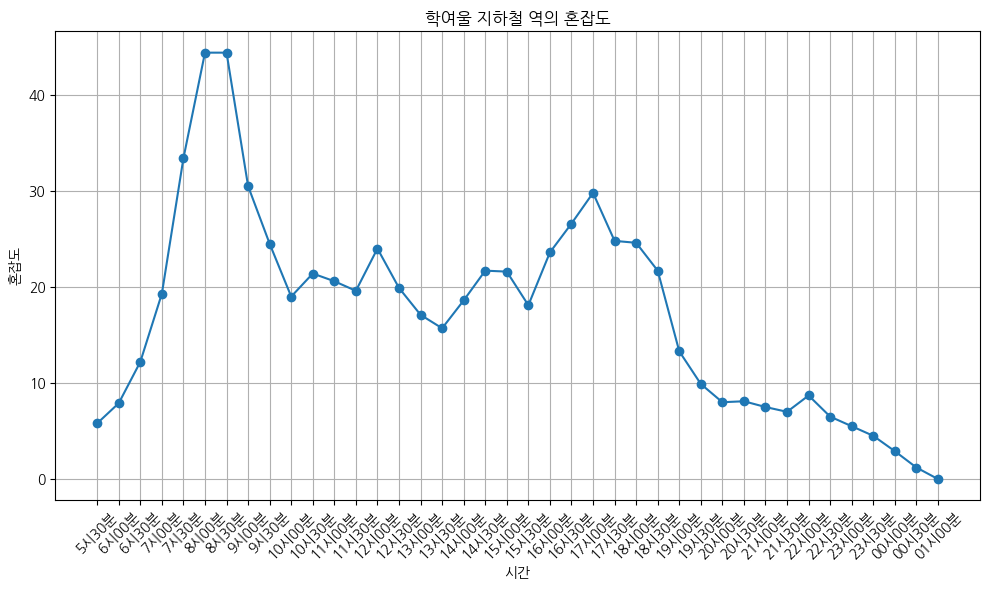

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 불러옵니다.
subway_congestion_data = pd.read_csv("서울교통공사_지하철혼잡도정보_20231231.csv", encoding='cp949')

# 강남구에 있는 지하철 역 목록을 수동으로 작성합니다.
gangnam_stations = ['강남', '역삼', '선릉', '삼성', '봉은사', '청담', '학동', '압구정로데오','신사','압구정','수서','대치','개포동','도곡','한티','선정릉','언주','논현','강남구청','삼성중앙','신논현','매봉','학여울','구룡','대모산입구','대청','일원']

# 사용자로부터 강남구에 있는 지하철 역 중 하나를 입력 받습니다.
user_input = input("강남구에 있는 지하철 역 중 하나를 입력하세요: ")

# 입력된 역이 강남구에 있는 지하철 역 중 하나와 일치하는지 확인합니다 (대소문자 구분 없이).
if user_input.strip().lower() in [station.strip().lower() for station in gangnam_stations]:
    # 입력된 역에 대한 데이터를 추출합니다.
    selected_station_data = subway_congestion_data[subway_congestion_data['출발역'].str.strip().str.lower() == user_input.strip().lower()]

    # 한글 폰트 설정
    plt.rcParams["font.family"] = 'NanumGothic'

    # 입력된 역에 대한 시간대별 혼잡도를 시각화합니다.
    plt.figure(figsize=(10, 6))
    plt.plot(selected_station_data.columns[6:], selected_station_data.iloc[0, 6:], marker='o', linestyle='-')
    plt.title(f"{user_input} 지하철 역의 혼잡도")
    plt.xlabel("시간")
    plt.ylabel("혼잡도")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("입력하신 역은 강남구에 위치한 지하철 역이 아닙니다.")
